# Clustering

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('hci_clustering_data_1.csv')
df.head()

,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_CREDIT,prob_0
0,0.538863,0.030108,225000.0,284400.0,0.179010
1,0.593718,0.355126,279000.0,323194.5,0.456898
2,0.283712,0.489540,252000.0,318528.0,0.308383
3,0.141992,0.159679,135000.0,170640.0,0.168785
4,0.456110,0.769052,238500.0,263686.5,0.456043


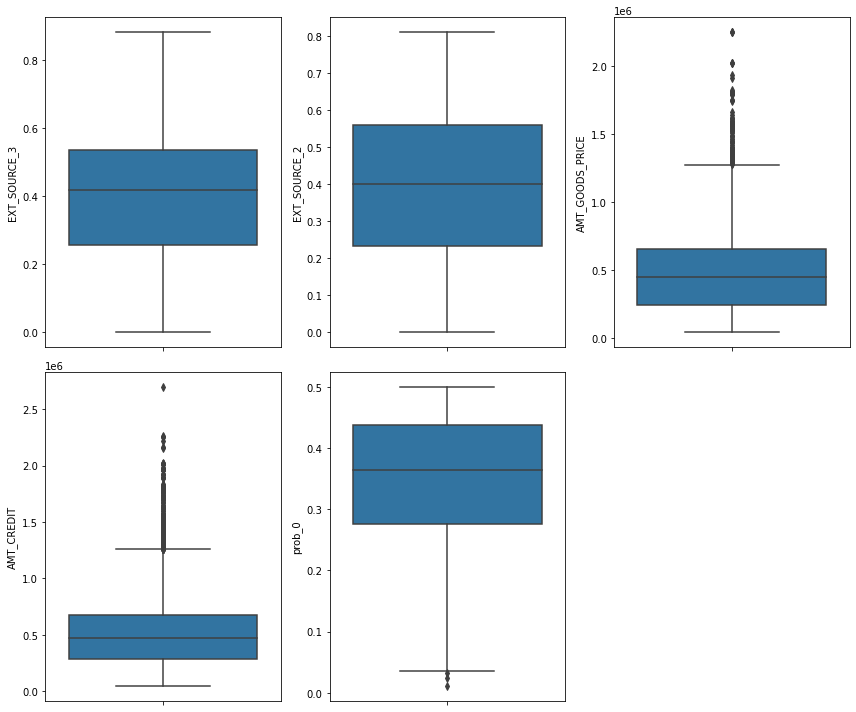

In [112]:
cols = df.columns.tolist()
plt.figure(figsize=(12, 10))
for i in range(len(cols)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[cols[i]])
    plt.tight_layout()

In [113]:
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - 1.5*iqr
    up_lim = q3 + 1.5*iqr
    outlier = []
    for x in df[col]:
        if ((x > up_lim) or (x < low_lim)):
            outlier.append(x)
    if len(outlier) != 0 :
        print(f"{col} column has outliers outside lower limit {low_lim} and upper limit {up_lim}")
        print(f"Outliers in {col} column are {len(outlier)}\n")

AMT_GOODS_PRICE column has outliers outside lower limit -382500.0 and upper limit 1273500.0
Outliers in AMT_GOODS_PRICE column are 308

AMT_CREDIT column has outliers outside lower limit -301500.0 and upper limit 1260900.0
Outliers in AMT_CREDIT column are 682

prob_0 column has outliers outside lower limit 0.033616451249999985 and upper limit 0.67978044125
Outliers in prob_0 column are 3



In [114]:
df['EXT_SOURCE_3_SC'] = df['EXT_SOURCE_3']
df['EXT_SOURCE_2_SC'] = df['EXT_SOURCE_2']
df['AMT_GOODS_PRICE_SC'] = df['AMT_GOODS_PRICE']
df['AMT_CREDIT_SC'] = df['AMT_CREDIT']
df['prob_0_SC'] = df['prob_0']

In [115]:
df.loc[df['prob_0_SC'] < 0.033616451249999985, 'prob_0_SC'] = 0.033616451249999985
df.loc[df['AMT_GOODS_PRICE_SC'] > 1273500.0, 'AMT_GOODS_PRICE_SC'] = 1273500.0
df.loc[df['AMT_CREDIT_SC'] > 1260900.0, 'AMT_CREDIT_SC'] = 1260900.0

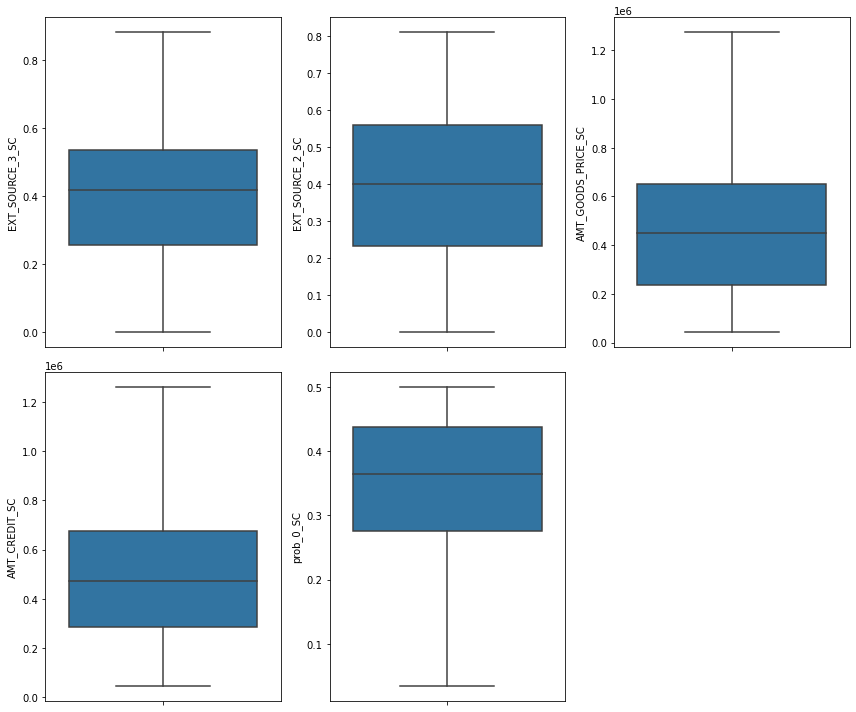

In [116]:
cols = ['EXT_SOURCE_3_SC', 'EXT_SOURCE_2_SC', 'AMT_GOODS_PRICE_SC', 'AMT_CREDIT_SC', 'prob_0_SC']

plt.figure(figsize=(12, 10))
for i in range(len(cols)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[cols[i]])
    plt.tight_layout()

In [117]:
df_scaled = df.filter(['EXT_SOURCE_3_SC', 'EXT_SOURCE_2_SC', 'AMT_GOODS_PRICE_SC', 'AMT_CREDIT_SC', 'prob_0_SC'])
scaler_s = MinMaxScaler()
df_scaled = scaler_s.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=['EXT_SOURCE_3_SC', 'EXT_SOURCE_2_SC', 'AMT_GOODS_PRICE_SC', 'AMT_CREDIT_SC', 'prob_0_SC'])
df_scaled.head()

,EXT_SOURCE_3_SC,EXT_SOURCE_2_SC,AMT_GOODS_PRICE_SC,AMT_CREDIT_SC,prob_0_SC
0,0.610356,0.037197,0.146520,0.196891,0.311747
1,0.672549,0.438811,0.190476,0.228797,0.907585
2,0.321070,0.604902,0.168498,0.224959,0.589144
3,0.160390,0.197304,0.073260,0.103331,0.289824
4,0.516532,0.950286,0.157509,0.179856,0.905751


<AxesSubplot:title={'center':'Inertia Evaluation Score'}>

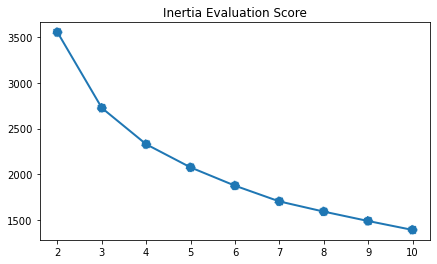

In [118]:
inertia = []
 
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)#, random_state=0)
    kmeans.fit(df_scaled.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.title('Inertia Evaluation Score', fontsize=12)
sns.lineplot(x=range(2, 11), y=inertia, linewidth = 2)
sns.scatterplot(x=range(2, 11), y=inertia, s=100, linestyle='--')

In [119]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    23.258865
1    14.531922
2    10.836196
3     9.594242
4     9.136536
5     6.512997
6     6.434837
7     6.506270
8          NaN
dtype: float64

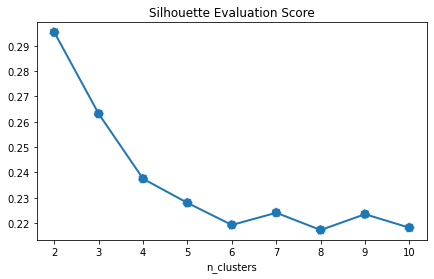

In [120]:
range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_scaled)
    preds = kmeans.predict(df_scaled)
    score_euclidean = silhouette_score(df_scaled, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Silhouette Evaluation Score', fontsize=12)
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean,  linewidth = 2)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=100, linestyle='--')
plt.xlabel('n_clusters')
plt.show()

In [121]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

df_cluster = df.filter(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'prob_0'])
df_cluster.columns = ['EXT_SOURCE_3_SC', 'EXT_SOURCE_2_SC', 'AMT_GOODS_PRICE_SC', 'AMT_CREDIT_SC', 'prob_0_SC']
df_cluster['cluster'] = kmeans.labels_

In [122]:
pca = PCA(n_components=2)

pca.fit(df_scaled)
pcs = pca.transform(df_scaled)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_scaled['cluster']
df_pca.sample(10)

,PC 1,PC 2,cluster
19586,-0.270048,0.054367,0
11691,-0.252027,-0.049220,0
837,1.064536,-0.144816,1
9087,-0.213888,0.119217,0
2291,-0.229855,0.104845,0
9117,0.796706,0.026389,1
530,-0.281837,0.239855,0
6278,-0.458420,0.539181,0
13381,-0.299144,0.121317,0
8480,0.730899,-0.316794,1


<AxesSubplot:title={'center':'2-D Visualization of Customer Clusters\nWih PCA'}, xlabel='PC 2', ylabel='PC 1'>

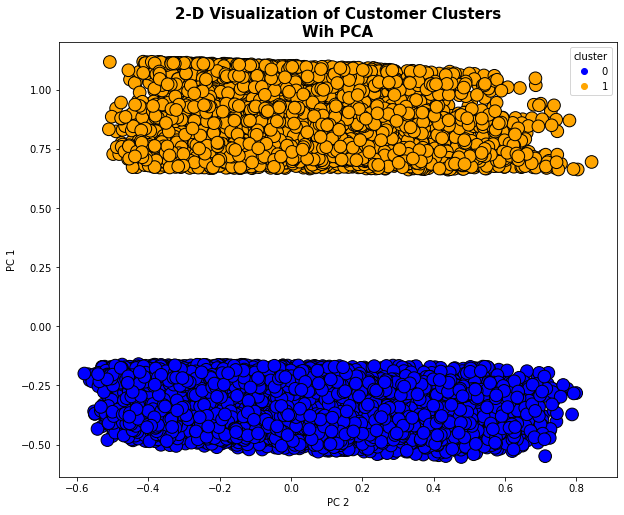

In [123]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clusters\nWih PCA", fontsize=15, weight='bold')
sns.scatterplot(y="PC 1", 
                x="PC 2",
                hue="cluster",
                edgecolor='black',
                data=df_pca,
                palette=['blue','orange'],
                s=160,
                ax=ax)

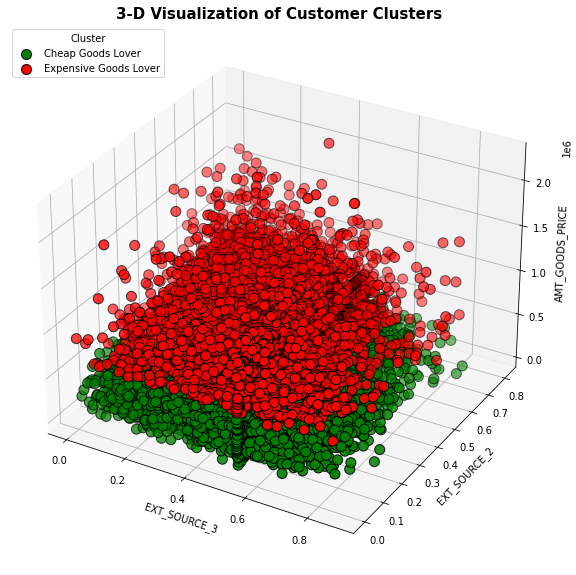

In [140]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters", fontsize=15, weight='bold')
ax.scatter(df_cluster['EXT_SOURCE_3_SC'][df_cluster.cluster == 0], df_cluster['EXT_SOURCE_2_SC'][df_cluster.cluster == 0], df_cluster['AMT_GOODS_PRICE_SC'][df_cluster.cluster == 0], c='green', s=100, edgecolor='black', label='Cheap Goods Lover')
ax.scatter(df_cluster['EXT_SOURCE_3_SC'][df_cluster.cluster == 1], df_cluster['EXT_SOURCE_2_SC'][df_cluster.cluster == 1], df_cluster['AMT_GOODS_PRICE_SC'][df_cluster.cluster == 1], c='red', s=100, edgecolor='black', label='Expensive Goods Lover')


plt.xlabel('EXT_SOURCE_3')
plt.ylabel('EXT_SOURCE_2')
ax.set_zlabel('AMT_GOODS_PRICE')
plt.legend(title='Cluster', loc='upper left')
plt.show()

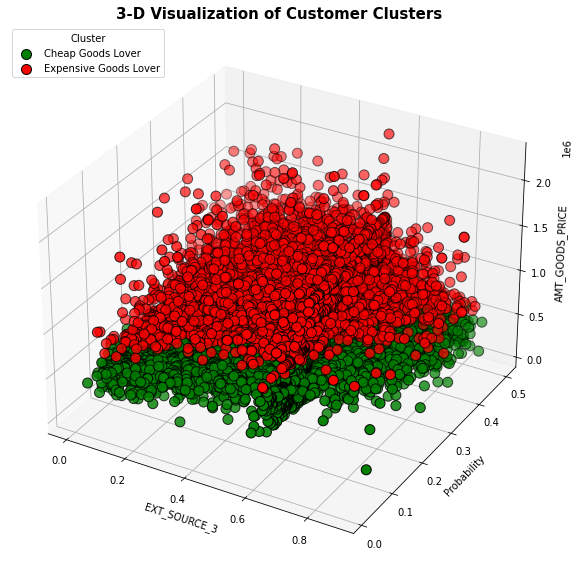

In [139]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters", fontsize=15, weight='bold')
ax.scatter(df_cluster['EXT_SOURCE_3_SC'][df_cluster.cluster == 0], df_cluster['prob_0_SC'][df_cluster.cluster == 0], df_cluster['AMT_GOODS_PRICE_SC'][df_cluster.cluster == 0], c='green', s=100, edgecolor='black', label='Cheap Goods Lover')
ax.scatter(df_cluster['EXT_SOURCE_3_SC'][df_cluster.cluster == 1], df_cluster['prob_0_SC'][df_cluster.cluster == 1], df_cluster['AMT_GOODS_PRICE_SC'][df_cluster.cluster == 1], c='red', s=100, edgecolor='black', label='Expensive Goods Lover')


plt.xlabel('EXT_SOURCE_3')
plt.ylabel('Probability')
ax.set_zlabel('AMT_GOODS_PRICE')
plt.legend(title='Cluster', loc='upper left')
plt.show()

### Interpretation

In [135]:
df['Cluster'] = kmeans.labels_
df.sample(5)

,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_CREDIT,prob_0,EXT_SOURCE_3_SC,EXT_SOURCE_2_SC,AMT_GOODS_PRICE_SC,AMT_CREDIT_SC,prob_0_SC,Cluster
27111,0.535276,0.324605,315000.0,364896.0,0.327337,0.535276,0.324605,315000.0,364896.0,0.327337,0
27355,0.190706,0.348275,450000.0,450000.0,0.341824,0.190706,0.348275,450000.0,450000.0,0.341824,0
16114,0.000527,0.716012,225000.0,225000.0,0.489334,0.000527,0.716012,225000.0,225000.0,0.489334,0
45515,0.535276,0.031101,225000.0,239850.0,0.321412,0.535276,0.031101,225000.0,239850.0,0.321412,0
24529,0.056475,0.038496,1332000.0,1525405.5,0.328231,0.056475,0.038496,1273500.0,1260900.0,0.328231,1


In [136]:
display(df.groupby(['Cluster']).describe())

EXT_SOURCE_3                                                    \
               count      mean       std       min       25%       50%   
Cluster                                                                  
0            14277.0  0.398784  0.172982  0.000527  0.258084  0.425893   
1             5661.0  0.388917  0.170978  0.000527  0.249885  0.397946   

                            EXT_SOURCE_2                                \
              75%       max        count      mean       std       min   
Cluster                                                                  
0        0.535276  0.882530      14277.0  0.384332  0.196915  0.000005   
1        0.535276  0.859053       5661.0  0.399118  0.193028  0.000039   

                                                AMT_GOODS_PRICE  \
              25%       50%       75%       max           count   
Cluster                                                           
0        0.225757  0.394101  0.555599  0.795535         14277.0   
1        0.247559  0.413418  0.563435  0.809284          5661.0   

                                                                               \
                  mean            std       min       25%       50%       75%   
Cluster                                                                         
0        322396.123660  123957.024719   45000.0  225000.0  315000.0  450000.0   
1        818797.125596  230434.490455  477000.0  675000.0  679500.0  900000.0   

                   AMT_CREDIT                                          \
               max      count           mean            std       min   
Cluster                                                                 
0         648000.0    14277.0  373049.467955  149719.359249   45000.0   
1        2250000.0     5661.0  930671.868045  254061.402687  576000.0   

                                                    prob_0                     \
              25%       50%        75%        max    count     mean       std   
Cluster                                                                         
0        254700.0  360000.0   508500.0   722430.0  14277.0  0.34191  0.105137   
1        754740.0  841500.0  1078200.0  2695500.0   5661.0  0.37018  0.094742   

                                                         EXT_SOURCE_3_SC  \
              min       25%       50%      75%       max           count   
Cluster                                                                    
0        0.010549  0.264102  0.355151  0.43119  0.499999         14277.0   
1        0.037638  0.305085  0.388473  0.45027  0.499913          5661.0   

                                                                               \
             mean       std       min       25%       50%       75%       max   
Cluster                                                                         
0        0.398784  0.172982  0.000527  0.258084  0.425893  0.535276  0.882530   
1        0.388917  0.170978  0.000527  0.249885  0.397946  0.535276  0.859053   

        EXT_SOURCE_2_SC                                                    \
                  count      mean       std       min       25%       50%   
Cluster                                                                     
0               14277.0  0.384332  0.196915  0.000005  0.225757  0.394101   
1                5661.0  0.399118  0.193028  0.000039  0.247559  0.413418   

                            AMT_GOODS_PRICE_SC                               \
              75%       max              count          mean            std   
Cluster                                                                       
0        0.555599  0.795535            14277.0  322396.12366  123957.024719   
1        0.563435  0.809284             5661.0  808053.08744  197501.053587   

                                                           AMT_CREDIT_SC  \
              min       25%       50%       75%        max         count   
Cluster                        

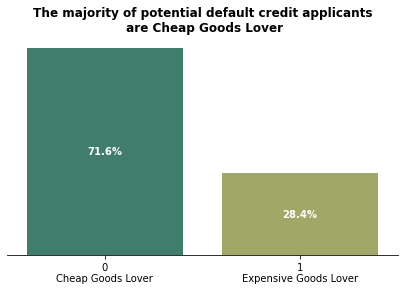

In [144]:
customer = df.groupby('Cluster')['Cluster'].count()/len(df)
customer = customer.to_frame().rename(columns={'Cluster':'%Customer'}).sort_values(by='%Customer',ascending=False).reset_index()

plt.figure(figsize=(7, 4))
ax = sns.barplot(x='Cluster', y='%Customer', data=customer, palette='gist_earth')
plt.title('The majority of potential default credit applicants\n are Cheap Goods Lover', fontweight='bold')
plt.bar_label(ax.containers[0], ['71.6%', '28.4%'], label_type='center',
             color='white', fontweight='bold')
plt.xticks(np.arange(2), ['0\nCheap Goods Lover', '1\nExpensive Goods Lover'])
plt.yticks(None)
plt.xlabel(None)
ax.axes.yaxis.set_visible(False)
sns.despine(left=True)

Text(0, 0.5, 'AMT_GOODS_PRICE')

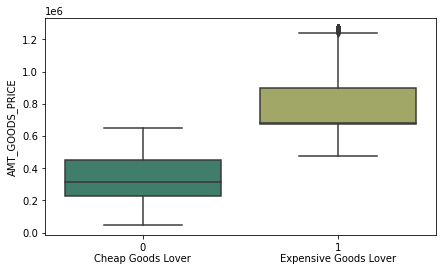

In [145]:
plt.figure(figsize=(7, 4))
ax = sns.boxplot(y=df['AMT_GOODS_PRICE_SC'], x=df['Cluster'], palette='gist_earth')
plt.xticks(np.arange(2), ['0\nCheap Goods Lover', '1\nExpensive Goods Lover'])
plt.xlabel(None)
plt.ylabel('AMT_GOODS_PRICE')

Text(0, 0.5, 'AMT_CREDIT')

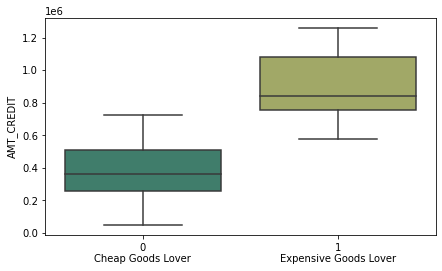

In [147]:
plt.figure(figsize=(7, 4))
ax = sns.boxplot(y=df['AMT_CREDIT_SC'], x=df['Cluster'], palette='gist_earth')
plt.xticks(np.arange(2), ['0\nCheap Goods Lover', '1\nExpensive Goods Lover'])
plt.xlabel(None)
plt.ylabel('AMT_CREDIT')

Text(0, 0.5, 'Acceptance Probability')

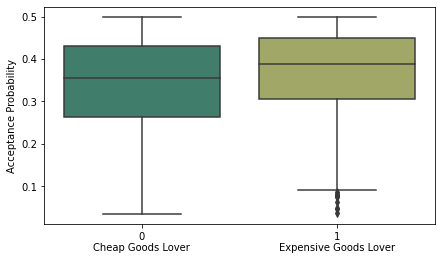

In [146]:
plt.figure(figsize=(7, 4))
ax = sns.boxplot(y=df['prob_0_SC'], x=df['Cluster'], palette='gist_earth')
plt.xticks(np.arange(2), ['0\nCheap Goods Lover', '1\nExpensive Goods Lover'])
plt.xlabel(None)
plt.ylabel('Acceptance Probability')

Text(0, 0.5, 'EXT_SOURCE_2')

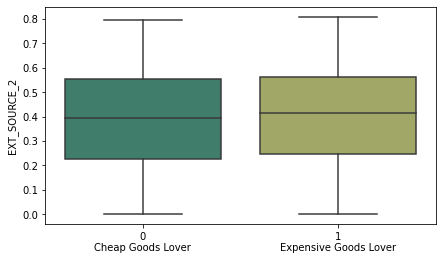

In [149]:
plt.figure(figsize=(7, 4))
ax = sns.boxplot(y=df['EXT_SOURCE_2_SC'], x=df['Cluster'], palette='gist_earth')
plt.xticks(np.arange(2), ['0\nCheap Goods Lover', '1\nExpensive Goods Lover'])
plt.xlabel(None)
plt.ylabel('EXT_SOURCE_2')

Text(0, 0.5, 'EXT_SOURCE_3')

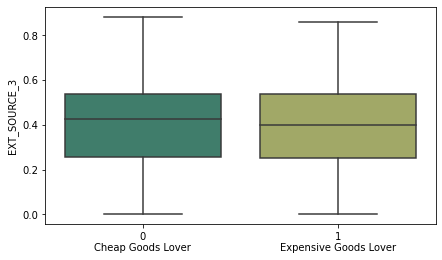

In [148]:
plt.figure(figsize=(7, 4))
ax = sns.boxplot(y=df['EXT_SOURCE_3_SC'], x=df['Cluster'], palette='gist_earth')
plt.xticks(np.arange(2), ['0\nCheap Goods Lover', '1\nExpensive Goods Lover'])
plt.xlabel(None)
plt.ylabel('EXT_SOURCE_3')